In [206]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# To display multiple dataframes from one cell
from IPython.display import display

# To perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# To build a logistic regression model
from sklearn.linear_model import LinearRegression

#To build exponential smoothening models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# To visualize ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# To build ARIMA model
from statsmodels.tsa.arima.model import ARIMA

#  To perform date arithmetic, allowing easy calculations and manipulations
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import adfuller

# To evaluate the performance of the model
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import statsmodels.tools.eval_measures as em
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [207]:
df = pd.read_csv("Rose.csv")

In [208]:
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [209]:
df.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [210]:
df.dtypes

YearMonth     object
Rose         float64
dtype: object

In [211]:
df.isnull().sum()

YearMonth    0
Rose         2
dtype: int64

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [213]:
round(df.describe(),3)

,Rose
count,185.000
mean,90.395
std,39.175
min,28.000
25%,63.000
50%,86.000
75%,112.000
max,267.000


In [214]:
df.shape

(187, 2)

In [215]:
df = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [216]:
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [217]:
df.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


# Exploratory Data Analysis

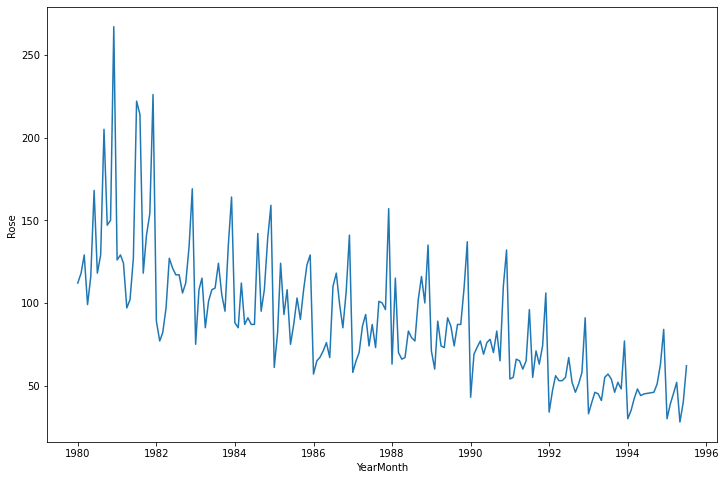

In [218]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x=df.index, y='Rose')  
plt.show()

In [219]:
#We will resample the data to get values at a month-level from the day-level data by taking the average over the months.

df = df.resample('M').mean()
df.head()

,Rose
YearMonth,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [220]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


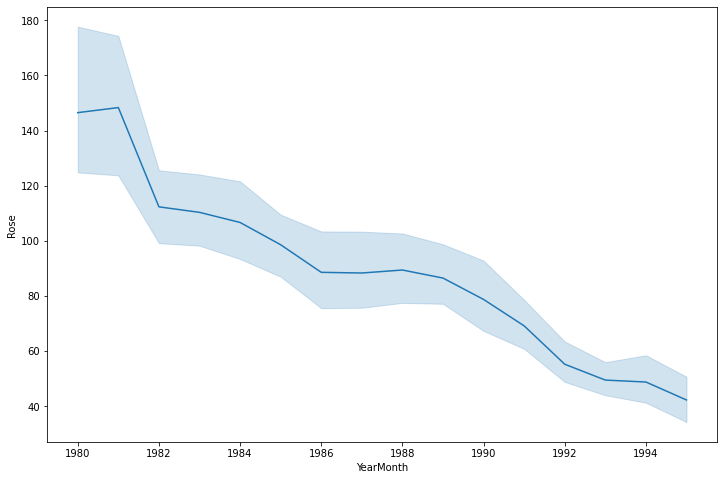

In [221]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x=df.index.year, y='Rose') 
plt.show()

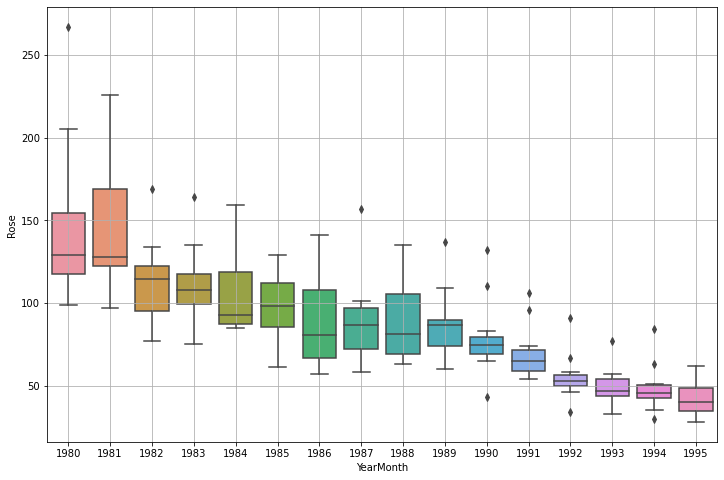

In [222]:
plt.figure(figsize=(12, 8))

# Plot a boxplot at year level
sns.boxplot(x=df.index.year, y='Rose', data=df) 
plt.grid()
plt.show()

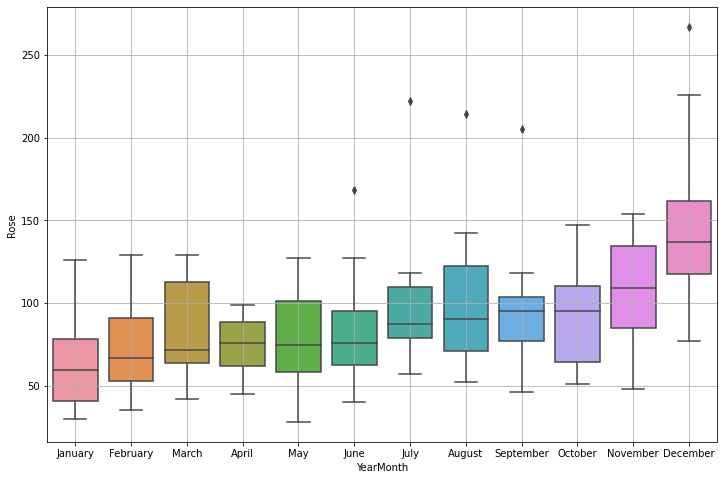

In [223]:
plt.figure(figsize=(12, 8))

# Plot a boxplot at month level
sns.boxplot(x=df.index.month_name(), y='Rose', data=df) 
plt.grid()
plt.show()

In [224]:
monthly_price_across_years = pd.pivot_table(df, values='Rose', columns=df.index.month_name(), index=df.index.year)
monthly_price_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


<Figure size 1080x576 with 0 Axes>

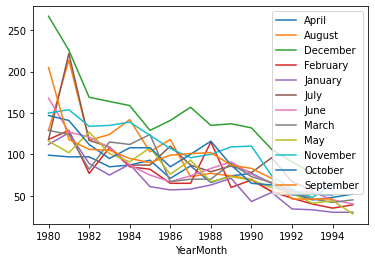

In [225]:
plt.figure(figsize=(15, 8))

# the code to plot the trend of months across years
monthly_price_across_years.plot()

plt.legend(loc='best')
plt.show()

In [226]:
nan_rows = df[df.isnull().any(axis=1)]

# Print rows with NaN values
print("Rows with NaN values:")
print(nan_rows)

Rows with NaN values:
            Rose
YearMonth       
1994-07-31   NaN
1994-08-31   NaN


In [227]:
july_mean = monthly_price_across_years['July'].mean()
df.loc['1994-07-31', 'Rose'] = july_mean
august_mean = monthly_price_across_years['August'].mean()
df.loc['1994-08-31', 'Rose'] = august_mean

# Decomposition

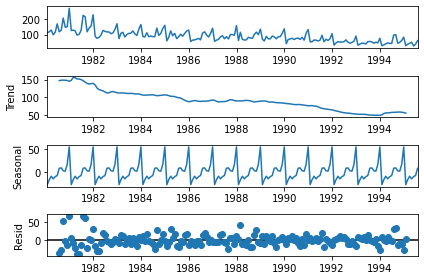

In [228]:
#Decompose the time series additively
df_add_decompose = seasonal_decompose(df, model = 'additive', period = 12)

df_add_decompose.plot()
plt.show()

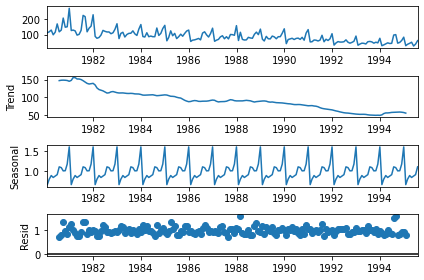

In [229]:
##Decompose the time series multiplicatively
df_mul_decompose = seasonal_decompose(df, model = "multiplicative")
df_mul_decompose.plot()
plt.show()

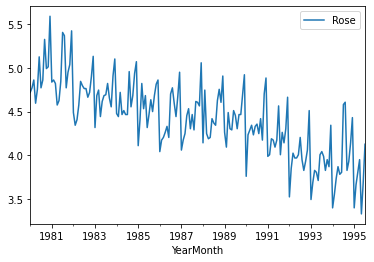

In [230]:
#Let's try to do log transformation
df_log = df.copy()

df_log['Rose'] = np.log(df)

df_log.Rose

#Visualize the log transformed series
df_log.plot()
plt.show()

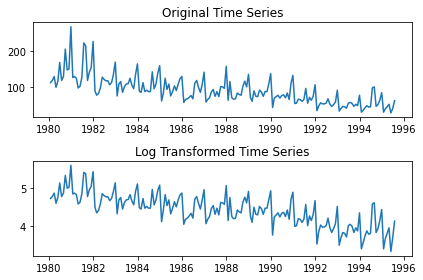

In [231]:
#Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df_log)
plt.tight_layout()

# Data Pre-processing

In [232]:
train = df[0:int(len(df)*0.7)] 
test = df[int(len(df)*0.7):]

In [233]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


In [234]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-06-30,76.0
1990-07-31,78.0
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0


First few rows of Test Data


,Rose
YearMonth,
1990-11-30,110.0
1990-12-31,132.0
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


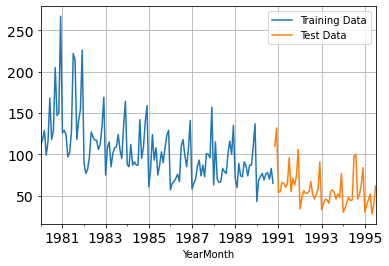

In [235]:
train['Rose'].plot(fontsize=14)
test['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Model Building - Original Data

## Linear Regression 

In [236]:
# Generate numerical time instance order for training set
train_time = [i+1 for i in range(len(train))]

# Generate numerical time instance order for test set
test_time = [i+len(train) for i in range(len(test))]

# Print the generated time instance orders
print('Training Time instance:\n', train_time)
print('Test Time instance:\n', test_time)

Training Time instance:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance:
 [130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


In [237]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [238]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
             Rose  time
YearMonth             
1990-06-30  76.0   126
1990-07-31  78.0   127
1990-08-31  70.0   128
1990-09-30  83.0   129
1990-10-31  65.0   130 

First few rows of Test Data 
              Rose  time
YearMonth              
1990-11-30  110.0   130
1990-12-31  132.0   131
1991-01-31   54.0   132
1991-02-28   55.0   133
1991-03-31   66.0   134 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-31  45.0   182
1995-04-30  52.0   183
1995-05-31  28.0   184
1995-06-30  40.0   185
1995-07-31  62.0   186 



In [239]:
lr = LinearRegression()

In [240]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

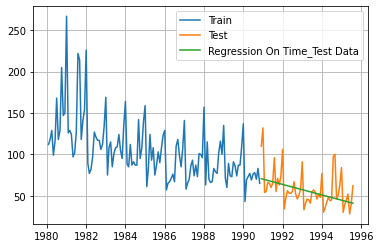

In [241]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

### Model Evaluation 

In [242]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 19.864 


In [243]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,19.864009


## Naive Approach 

In [244]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [245]:
train.tail()

,Rose
YearMonth,
1990-06-30,76.0
1990-07-31,78.0
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0


In [246]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1990-11-30    65.0
1990-12-31    65.0
1991-01-31    65.0
1991-02-28    65.0
1991-03-31    65.0
Freq: M, Name: naive, dtype: float64

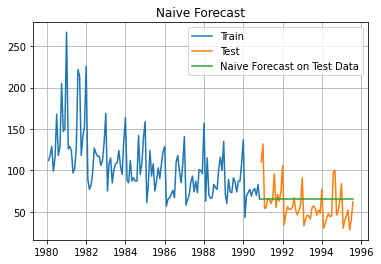

In [247]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation 

In [248]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 22.374


In [249]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,19.864009
NaiveModel,22.374447


## Simple Average 

In [250]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [251]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1990-11-30,110.0,104.692308
1990-12-31,132.0,104.692308
1991-01-31,54.0,104.692308
1991-02-28,55.0,104.692308
1991-03-31,66.0,104.692308


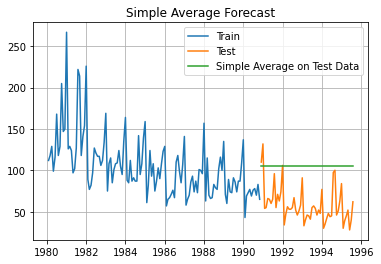

In [252]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation 

In [253]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 51.238


In [254]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,19.864009
NaiveModel,22.374447
SimpleAverageModel,51.238342


## Moving Average(MA) 

In [255]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [256]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


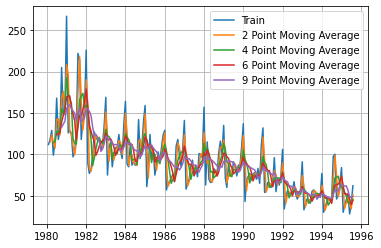

In [257]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [258]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

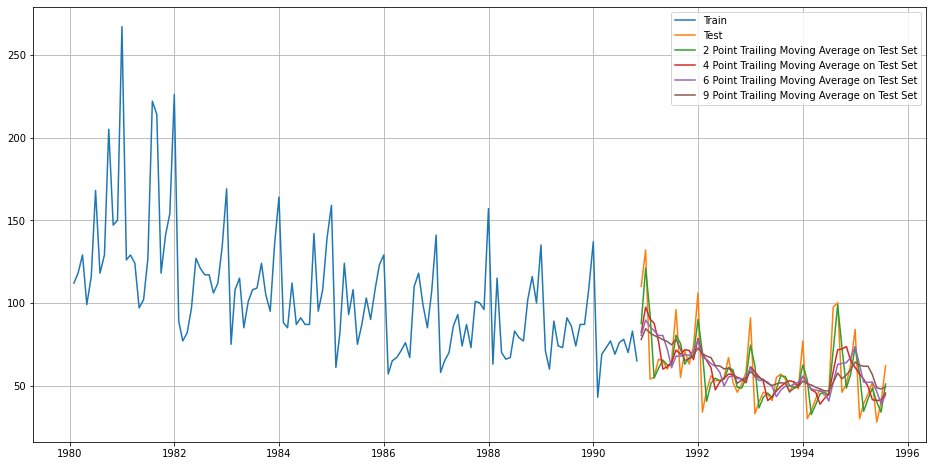

In [259]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

In [260]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 12.815
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 17.184
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 17.725
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 18.557


In [261]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,19.864009
NaiveModel,22.374447
SimpleAverageModel,51.238342
2pointTrailingMovingAverage,12.815041
4pointTrailingMovingAverage,17.184213
6pointTrailingMovingAverage,17.724516
9pointTrailingMovingAverage,18.556574


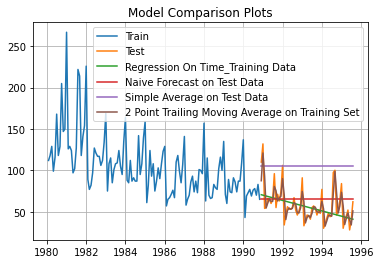

In [262]:
## Plotting on both Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Simple Exponential Smoothening Models 

In [263]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [264]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [265]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.10272100493683696,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.26284082377956,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [266]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1990-11-30    78.899525
1990-12-31    78.899525
1991-01-31    78.899525
1991-02-28    78.899525
1991-03-31    78.899525
1991-04-30    78.899525
1991-05-31    78.899525
1991-06-30    78.899525
1991-07-31    78.899525
1991-08-31    78.899525
1991-09-30    78.899525
1991-10-31    78.899525
1991-11-30    78.899525
1991-12-31    78.899525
1992-01-31    78.899525
1992-02-29    78.899525
1992-03-31    78.899525
1992-04-30    78.899525
1992-05-31    78.899525
1992-06-30    78.899525
1992-07-31    78.899525
1992-08-31    78.899525
1992-09-30    78.899525
1992-10-31    78.899525
1992-11-30    78.899525
1992-12-31    78.899525
1993-01-31    78.899525
1993-02-28    78.899525
1993-03-31    78.899525
1993-04-30    78.899525
1993-05-31    78.899525
1993-06-30    78.899525
1993-07-31    78.899525
1993-08-31    78.899525
1993-09-30    78.899525
1993-10-31    78.899525
1993-11-30    78.899525
1993-12-31    78.899525
1994-01-31    78.899525
1994-02-28    78.899525
1994-03-31    78.899525
1994-04-30    78

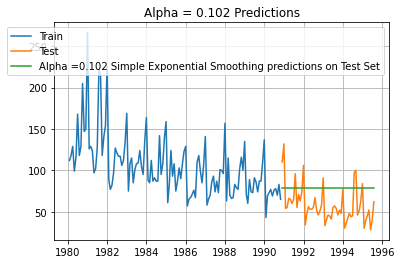

In [267]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.102 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.102 Predictions');

In [268]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [269]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 29.768404800540043
SES RMSE (calculated using statsmodels): 29.768404800540043


In [270]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.102,SES'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,19.864009
NaiveModel,22.374447
SimpleAverageModel,51.238342
2pointTrailingMovingAverage,12.815041
4pointTrailingMovingAverage,17.184213
6pointTrailingMovingAverage,17.724516
9pointTrailingMovingAverage,18.556574
"Alpha=0.102,SES",29.768405


## Holt - ETS(A, A, N) - Holt's linear method with additive errors
## Double Exponential Smoothing¶ 

In [271]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.15849768299408634, 'smoothing_trend': 0.10653336272408515, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 131.3618884097747, 'initial_trend': 1.4806378622676117, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [272]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1990-11-30    72.315591
1990-12-31    71.370290
1991-01-31    70.424988
1991-02-28    69.479687
1991-03-31    68.534385
1991-04-30    67.589084
1991-05-31    66.643782
1991-06-30    65.698481
1991-07-31    64.753179
1991-08-31    63.807878
1991-09-30    62.862576
1991-10-31    61.917275
1991-11-30    60.971973
1991-12-31    60.026672
1992-01-31    59.081370
1992-02-29    58.136069
1992-03-31    57.190767
1992-04-30    56.245466
1992-05-31    55.300164
1992-06-30    54.354863
1992-07-31    53.409561
1992-08-31    52.464260
1992-09-30    51.518958
1992-10-31    50.573657
1992-11-30    49.628355
1992-12-31    48.683054
1993-01-31    47.737752
1993-02-28    46.792451
1993-03-31    45.847149
1993-04-30    44.901848
1993-05-31    43.956546
1993-06-30    43.011245
1993-07-31    42.065943
1993-08-31    41.120642
1993-09-30    40.175340
1993-10-31    39.230039
1993-11-30    38.284737
1993-12-31    37.339436
1994-01-31    36.394134
1994-02-28    35.448833
1994-03-31    34.503531
1994-04-30    33

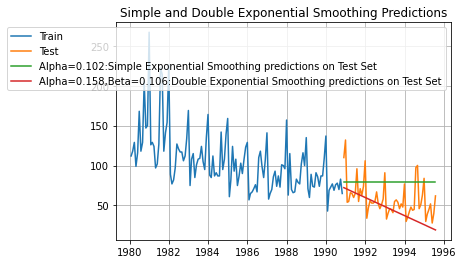

In [273]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.102:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.158,Beta=0.106:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [274]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 24.39684843587642


In [275]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.158,Beta=0.106:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,19.864009
NaiveModel,22.374447
SimpleAverageModel,51.238342
2pointTrailingMovingAverage,12.815041
4pointTrailingMovingAverage,17.184213
6pointTrailingMovingAverage,17.724516
9pointTrailingMovingAverage,18.556574
"Alpha=0.102,SES",29.768405
"Alpha=0.158,Beta=0.106:DES",24.396848


## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors 

In [276]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08829506527539115, 'smoothing_trend': 9.814104658031581e-07, 'smoothing_seasonal': 9.641663991608711e-05, 'damping_trend': nan, 'initial_level': 146.93438103038488, 'initial_trend': -0.5564380117261886, 'initial_seasons': array([-31.14676036, -18.77142217, -10.75975746, -21.38605299,
       -12.55715163,  -7.08670312,   2.83633991,   8.92770254,
         4.94979556,   3.04596856,  19.68667018,  63.90465032]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [277]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1990-11-30     93.685299
1990-12-31    137.346876
1991-01-31     41.739016
1991-02-28     53.557918
1991-03-31     61.013143
1991-04-30     49.830412
1991-05-31     58.102873
1991-06-30     63.016876
1991-07-31     72.383478
1991-08-31     77.918413
1991-09-30     73.384060
1991-10-31     70.925135
1991-11-30     87.008042
1991-12-31    130.669619
1992-01-31     35.061760
1992-02-29     46.880661
1992-03-31     54.335886
1992-04-30     43.153156
1992-05-31     51.425616
1992-06-30     56.339619
1992-07-31     65.706221
1992-08-31     71.241156
1992-09-30     66.706803
1992-10-31     64.247879
1992-11-30     80.330786
1992-12-31    123.992363
1993-01-31     28.384503
1993-02-28     40.203404
1993-03-31     47.658629
1993-04-30     36.475899
1993-05-31     44.748360
1993-06-30     49.662363
1993-07-31     59.028965
1993-08-31     64.563899
1993-09-30     60.029546
1993-10-31     57.570622
1993-11-30     73.653529
1993-12-31    117.315106
1994-01-31     21.707247
1994-02-28     33.526148


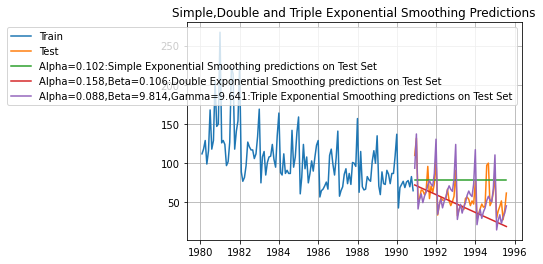

In [278]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.102:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.158,Beta=0.106:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.088,Beta=9.814,Gamma=9.641:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [279]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 16.074613084967055


In [280]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.088,Beta=9.814,Gamma=9.641:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,19.864009
NaiveModel,22.374447
SimpleAverageModel,51.238342
2pointTrailingMovingAverage,12.815041
4pointTrailingMovingAverage,17.184213
6pointTrailingMovingAverage,17.724516
9pointTrailingMovingAverage,18.556574
"Alpha=0.102,SES",29.768405
"Alpha=0.158,Beta=0.106:DES",24.396848
"Alpha=0.088,Beta=9.814,Gamma=9.641:TES",16.074613


## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

In [281]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters linear method ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters linear method ==

{'smoothing_level': 0.09929582516403294, 'smoothing_trend': 0.00011579899094879335, 'smoothing_seasonal': 0.0006694995284830673, 'damping_trend': nan, 'initial_level': 144.6150833355538, 'initial_trend': -0.5843194599617058, 'initial_seasons': array([0.75819946, 0.85683872, 0.93677882, 0.82149412, 0.922274  ,
       0.99357229, 1.09383301, 1.16982102, 1.09518559, 1.07713919,
       1.23853049, 1.70793685]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [282]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1990-11-30     86.309435
1990-12-31    117.999514
1991-01-31     51.933332
1991-02-28     58.212395
1991-03-31     63.091907
1991-04-30     54.858826
1991-05-31     61.032831
1991-06-30     65.154663
1991-07-31     71.093379
1991-08-31     75.338556
1991-09-30     69.921539
1991-10-31     68.147052
1991-11-30     77.626536
1991-12-31    106.028170
1992-01-31     46.619642
1992-02-29     52.205026
1992-03-31     56.524506
1992-04-30     49.098460
1992-05-31     54.567600
1992-06-30     58.191336
1992-07-31     63.427082
1992-08-31     67.140818
1992-09-30     62.243616
1992-10-31     60.594875
1992-11-30     68.943637
1992-12-31     94.056825
1993-01-31     41.305952
1993-02-28     46.197656
1993-03-31     49.957105
1993-04-30     43.338095
1993-05-31     48.102370
1993-06-30     51.228010
1993-07-31     55.760786
1993-08-31     58.943080
1993-09-30     54.565694
1993-10-31     53.042697
1993-11-30     60.260739
1993-12-31     82.085480
1994-01-31     35.992262
1994-02-28     40.190286


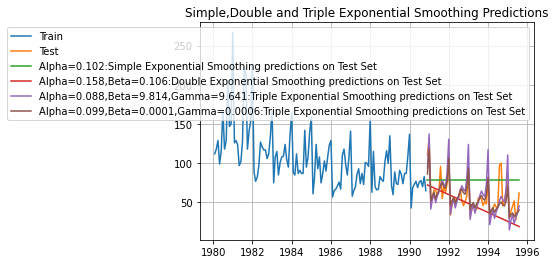

In [283]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.102:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.158,Beta=0.106:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.088,Beta=9.814,Gamma=9.641:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.099,Beta=0.0001,Gamma=0.0006:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [284]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 13.113063349263944


In [285]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.099,Beta=0.0001,Gamma=0.0006,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,19.864009
NaiveModel,22.374447
SimpleAverageModel,51.238342
2pointTrailingMovingAverage,12.815041
4pointTrailingMovingAverage,17.184213
6pointTrailingMovingAverage,17.724516
9pointTrailingMovingAverage,18.556574
"Alpha=0.102,SES",29.768405
"Alpha=0.158,Beta=0.106:DES",24.396848
"Alpha=0.088,Beta=9.814,Gamma=9.641:TES",16.074613


# Check for stationarity of the whole Time Series data.

In [286]:
dftest = adfuller(df)#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.938
DF test p-value is 0.3146


In [287]:
monthly_sales_data = pd.pivot_table(df, values = "Rose", columns = df.index.year, index = df.index.month_name())
monthly_sales_data

YearMonth,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
YearMonth,,,,,,,,,,,,,,,,
April,99.0,97.0,97.0,85.0,87.0,93.0,71.0,86.0,66.0,74.0,77.0,65.0,53.0,45.0,48.000000,52.0
August,129.0,214.0,117.0,124.0,142.0,103.0,118.0,73.0,77.0,74.0,70.0,55.0,52.0,54.0,100.142857,NaN
December,267.0,226.0,169.0,164.0,159.0,129.0,141.0,157.0,135.0,137.0,132.0,106.0,91.0,77.0,84.000000,NaN
February,118.0,129.0,77.0,108.0,85.0,82.0,65.0,65.0,115.0,60.0,69.0,55.0,47.0,40.0,35.000000,39.0
January,112.0,126.0,89.0,75.0,88.0,61.0,57.0,58.0,63.0,71.0,43.0,54.0,34.0,33.0,30.000000,30.0
July,118.0,222.0,117.0,109.0,87.0,87.0,110.0,87.0,79.0,86.0,78.0,96.0,67.0,57.0,97.466667,62.0
June,168.0,127.0,121.0,108.0,87.0,75.0,67.0,74.0,83.0,91.0,76.0,65.0,55.0,55.0,45.000000,40.0
March,129.0,124.0,82.0,115.0,112.0,124.0,67.0,70.0,70.0,89.0,73.0,66.0,56.0,46.0,42.000000,45.0
May,116.0,102.0,127.0,101.0,91.0,108.0,76.0,93.0,67.0,73.0,69.0,60.0,53.0,41.0,44.000000,28.0


In [288]:
monthly_sales_data = monthly_sales_data.reindex(index = ['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
monthly_sales_data

YearMonth,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
YearMonth,,,,,,,,,,,,,,,,
January,112.0,126.0,89.0,75.0,88.0,61.0,57.0,58.0,63.0,71.0,43.0,54.0,34.0,33.0,30.000000,30.0
February,118.0,129.0,77.0,108.0,85.0,82.0,65.0,65.0,115.0,60.0,69.0,55.0,47.0,40.0,35.000000,39.0
March,129.0,124.0,82.0,115.0,112.0,124.0,67.0,70.0,70.0,89.0,73.0,66.0,56.0,46.0,42.000000,45.0
April,99.0,97.0,97.0,85.0,87.0,93.0,71.0,86.0,66.0,74.0,77.0,65.0,53.0,45.0,48.000000,52.0
May,116.0,102.0,127.0,101.0,91.0,108.0,76.0,93.0,67.0,73.0,69.0,60.0,53.0,41.0,44.000000,28.0
June,168.0,127.0,121.0,108.0,87.0,75.0,67.0,74.0,83.0,91.0,76.0,65.0,55.0,55.0,45.000000,40.0
July,118.0,222.0,117.0,109.0,87.0,87.0,110.0,87.0,79.0,86.0,78.0,96.0,67.0,57.0,97.466667,62.0
August,129.0,214.0,117.0,124.0,142.0,103.0,118.0,73.0,77.0,74.0,70.0,55.0,52.0,54.0,100.142857,NaN
September,205.0,118.0,106.0,105.0,95.0,90.0,99.0,101.0,102.0,87.0,83.0,71.0,46.0,46.0,46.000000,NaN


<AxesSubplot:xlabel='YearMonth'>

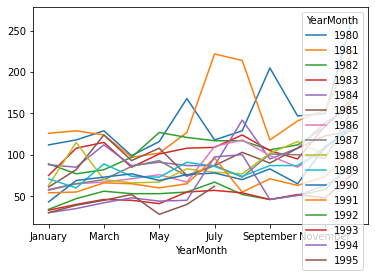

In [289]:
monthly_sales_data.plot()

In [290]:
yearly_sales_data = pd.pivot_table(df, values = "Rose", columns = df.index.month_name(), index = df.index.year)
yearly_sales_data = yearly_sales_data[['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]
yearly_sales_data

YearMonth,January,February,March,April,May,June,July,August,September,October,November,December
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


<AxesSubplot:xlabel='YearMonth'>

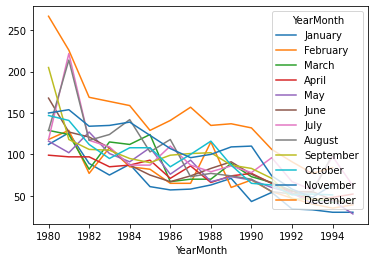

In [291]:
yearly_sales_data.plot()

<AxesSubplot:>

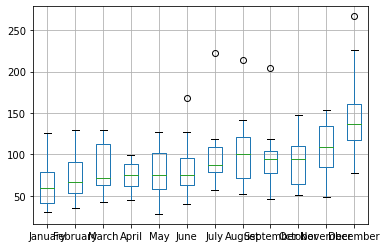

In [292]:
yearly_sales_data.boxplot()

In [293]:
result = adfuller(df)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

# If p-value is greater than 0.05, the data is non-stationary and may need to be made stationary

# Make the data stationary (if needed)
if result[1] > 0.05:
    # Perform differencing
    differenced_data = df.diff().dropna()
    # Or perform decomposition
    # decomposed_result = seasonal_decompose(time_series_data, model='additive')
    # stationary_data = decomposed_result.resid.dropna()
    print('Data made stationary.')
else:
    print('Data is already stationary.')

ADF Statistic: -1.9375726417334478
p-value: 0.31459733086647523
Critical Values:
	1%: -3.4687256239864017
	5%: -2.8783961376954363
	10%: -2.57575634100705
Data made stationary.


Text(0, 0.5, 'Sales')

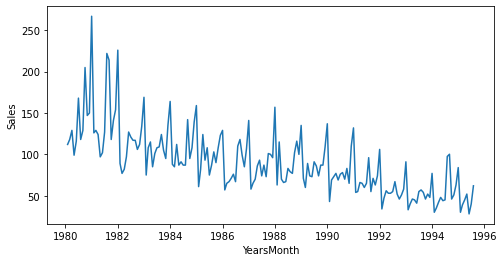

In [294]:
plt.figure(figsize=(8, 4))
plt.plot(df)
plt.xlabel('YearsMonth')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

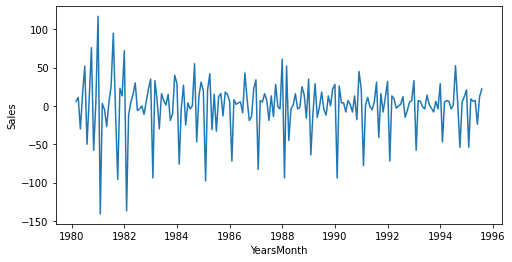

In [295]:
# Performing differencing ( d=1 ) as the data is non-stationary
plt.figure(figsize=(8, 4))
plt.plot(df.diff(periods=1))
plt.xlabel('YearsMonth')
plt.ylabel('Sales')

# Auto Regressive(AR) Models

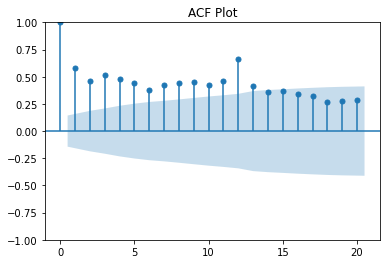

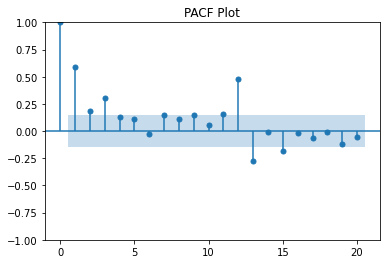

In [296]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Generate ACF plot
plot_acf(df, lags=20)
plt.title('ACF Plot')
plt.show()

# Generate PACF plot
plot_pacf(df, lags=20)
plt.title('PACF Plot')
plt.show()

In [297]:
# Define the p parameter to take any value between 0 and 2
p= range(1,4)

In [298]:
# Define the q parameter to take any value between 0 and 2
q = range(1, 4)


In [299]:
import itertools
d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [300]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [301]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [302]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [303]:
seasonal_pdq
# as it seems to have 12 month seasonality as confirmned from above 

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [304]:
dftest = adfuller(train['Rose'])#Stationarity check on train time series data 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.940
DF test p-value is 0.3135


In [305]:
df_log = np.log10(train['Rose'])
#Log transformation on the training data to make the time series stationary as we did with full data 

In [306]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

# AR Model

In [307]:
# Creating an empty Dataframe with column names only
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

,param,AIC


In [308]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_ar:
    ARIMA_model = ARIMA(df_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    AR_AIC = AR_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 0) - AIC:-172.2170806650721
ARIMA(2, 0, 0) - AIC:-172.32137910312673
ARIMA(3, 0, 0) - AIC:-176.7712183546709


In [309]:
best_model = ARIMA(df_log,order = (2,0,0))#p=2 with lowest AIC 
best_results = best_model.fit()

In [310]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  90.161
Date:                Mon, 18 Mar 2024   AIC                           -172.321
Time:                        01:25:11   BIC                           -160.851
Sample:                    01-31-1980   HQIC                          -167.661
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9965      0.027     73.544      0.000       1.943       2.050
ar.L1          0.3879      0.096      4.054      0.000       0.200       0.575
ar.L2          0.1268      0.113      1.124      0.2

In [311]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-11-30'), dynamic=True, full_results=True)

In [312]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [313]:
# Extract the predicted and true values of our time series
df_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['df_forecasted'] = np.power(10, pred99.predicted_mean)

In [314]:
# Compute the root mean square error
mse = ((testCopy1['Rose'] - testCopy1['df_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 46.338


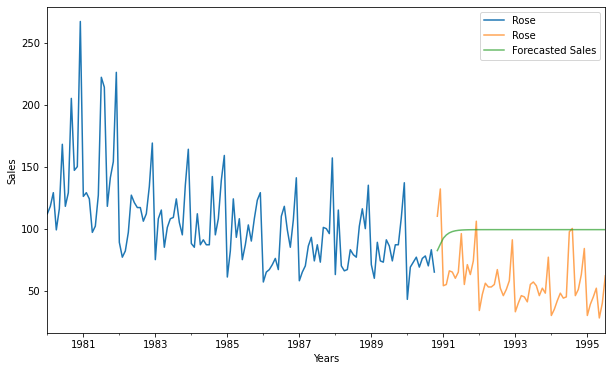

In [315]:
axis = train['Rose'].plot(label='Rose', figsize=(10, 6))
testCopy1['Rose'].plot(ax=axis, label='Rose', alpha=0.7)
testCopy1['df_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [316]:
resultsDf_10 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Best AR Model : ARIMA(2,0,0)'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

,Test RMSE
RegressionOnTime,19.864009
NaiveModel,22.374447
SimpleAverageModel,51.238342
2pointTrailingMovingAverage,12.815041
4pointTrailingMovingAverage,17.184213
6pointTrailingMovingAverage,17.724516
9pointTrailingMovingAverage,18.556574
"Alpha=0.102,SES",29.768405
"Alpha=0.158,Beta=0.106:DES",24.396848
"Alpha=0.088,Beta=9.814,Gamma=9.641:TES",16.074613


In [317]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [318]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_arma:
    ARIMA_model = ARIMA(df_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:-182.5073594926111
ARIMA(1, 0, 2) - AIC:-184.5584641108209
ARIMA(1, 0, 3) - AIC:-183.11119873629906
ARIMA(2, 0, 1) - AIC:-183.97687528082542
ARIMA(2, 0, 2) - AIC:-183.88805168984663
ARIMA(2, 0, 3) - AIC:-181.97663823278842
ARIMA(3, 0, 1) - AIC:-182.62430161349243
ARIMA(3, 0, 2) - AIC:-181.98502313762043
ARIMA(3, 0, 3) - AIC:-187.94781349342395


In [319]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
8,"(3, 0, 3)",-187.947813
1,"(1, 0, 2)",-184.558464
3,"(2, 0, 1)",-183.976875
4,"(2, 0, 2)",-183.888052
2,"(1, 0, 3)",-183.111199


In [320]:
best_model = ARIMA(df_log,order = (3,0,3))
best_results = best_model.fit()

In [321]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 101.974
Date:                Mon, 18 Mar 2024   AIC                           -187.948
Time:                        01:25:18   BIC                           -165.008
Sample:                    01-31-1980   HQIC                          -178.626
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0085      0.093     21.570      0.000       1.826       2.191
ar.L1         -0.6625      0.132     -5.008      0.000      -0.922      -0.403
ar.L2          0.9775      0.037     26.747      0.0

In [322]:
#Calculating RMSE for best MA model

In [323]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-11-30'), dynamic=True, full_results=True)

In [324]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [325]:
# Extract the predicted and true values of our time series
df_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['df_forecasted'] = np.power(10, pred99.predicted_mean)

In [326]:
# Compute the root mean square error
mse = ((testCopy1['Rose'] - testCopy1['df_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 34.892


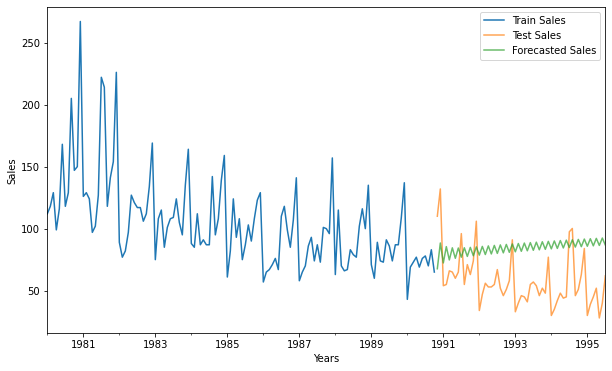

In [327]:
axis = train['Rose'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Rose'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['df_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [328]:
resultsDf_11 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Best ARMA Model : ARIMA(3,0,3)'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

,Test RMSE
RegressionOnTime,19.864009
NaiveModel,22.374447
SimpleAverageModel,51.238342
2pointTrailingMovingAverage,12.815041
4pointTrailingMovingAverage,17.184213
6pointTrailingMovingAverage,17.724516
9pointTrailingMovingAverage,18.556574
"Alpha=0.102,SES",29.768405
"Alpha=0.158,Beta=0.106:DES",24.396848
"Alpha=0.088,Beta=9.814,Gamma=9.641:TES",16.074613


In [329]:
# ARIMA Model building to estimate best 'p' , 'd' , 'q' paramters ( Lowest AIC Approach )

In [330]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [331]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(df_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:-182.5073594926111
ARIMA(1, 0, 2) - AIC:-184.5584641108209
ARIMA(1, 0, 3) - AIC:-183.11119873629906
ARIMA(1, 1, 1) - AIC:-185.8390579435197
ARIMA(1, 1, 2) - AIC:-185.77925788107757
ARIMA(1, 1, 3) - AIC:-183.86300088764386
ARIMA(2, 0, 1) - AIC:-183.97687528082542
ARIMA(2, 0, 2) - AIC:-183.88805168984663
ARIMA(2, 0, 3) - AIC:-181.97663823278842
ARIMA(2, 1, 1) - AIC:-184.5190201812606
ARIMA(2, 1, 2) - AIC:-183.8724738652746
ARIMA(2, 1, 3) - AIC:-181.884622561631
ARIMA(3, 0, 1) - AIC:-182.62430161349243
ARIMA(3, 0, 2) - AIC:-181.98502313762043
ARIMA(3, 0, 3) - AIC:-187.94781349342395
ARIMA(3, 1, 1) - AIC:-182.97828646851366
ARIMA(3, 1, 2) - AIC:-181.93030788403888
ARIMA(3, 1, 3) - AIC:-184.1021669626872


In [332]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
14,"(3, 0, 3)",-187.947813
3,"(1, 1, 1)",-185.839058
4,"(1, 1, 2)",-185.779258
1,"(1, 0, 2)",-184.558464
9,"(2, 1, 1)",-184.51902


In [333]:
# Building ARIMA model with best parameters p,d,q

In [334]:
best_model = ARIMA(df_log,order = (3,0,3))
best_results = best_model.fit()

In [335]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 101.974
Date:                Mon, 18 Mar 2024   AIC                           -187.948
Time:                        01:25:27   BIC                           -165.008
Sample:                    01-31-1980   HQIC                          -178.626
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0085      0.093     21.570      0.000       1.826       2.191
ar.L1         -0.6625      0.132     -5.008      0.000      -0.922      -0.403
ar.L2          0.9775      0.037     26.747      0.0

In [336]:
# Calculating RMSE for best ARIMA model 

In [337]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-11-30'), dynamic=True, full_results=True)

In [338]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [339]:
# Extract the predicted and true values of our time series
df_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['df_forecasted'] = np.power(10, pred99.predicted_mean)

In [340]:
# Compute the root mean square error
mse = ((testCopy1['Rose'] - testCopy1['df_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 34.892


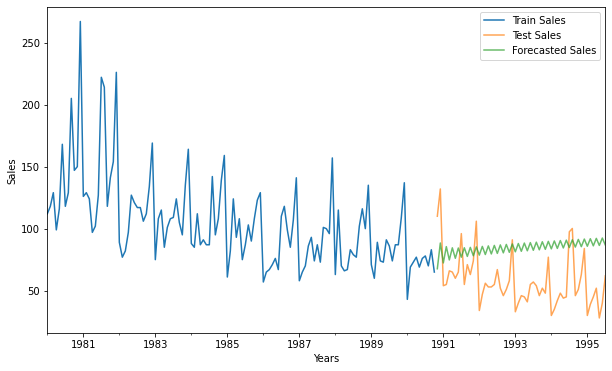

In [341]:
axis = train['Rose'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Rose'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['df_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [342]:
resultsDf_12 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Best ARIMA Model : ARIMA(3,0,3)'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

,Test RMSE
RegressionOnTime,19.864009
NaiveModel,22.374447
SimpleAverageModel,51.238342
2pointTrailingMovingAverage,12.815041
4pointTrailingMovingAverage,17.184213
6pointTrailingMovingAverage,17.724516
9pointTrailingMovingAverage,18.556574
"Alpha=0.102,SES",29.768405
"Alpha=0.158,Beta=0.106:DES",24.396848
"Alpha=0.088,Beta=9.814,Gamma=9.641:TES",16.074613


In [343]:
# SARIMA Model

In [344]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

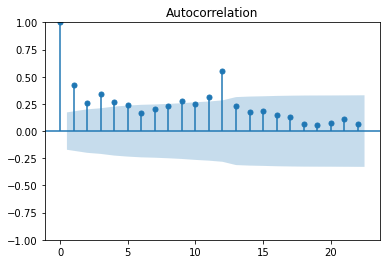

In [345]:
plot_acf(train['Rose'],alpha=0.05);

In [346]:
#SARIMA Model building to estimate best parameters

In [347]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [348]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [349]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(df_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.72738D-01    |proj g|=  3.50798D+00

At iterate    5    f= -8.83774D-01    |proj g|=  1.06026D+00

At iterate   10    f= -9.28994D-01    |proj g|=  2.15892D+00

At iterate   15    f= -9.72291D-01    |proj g|=  9.08002D-01

At iterate   20    f= -9.73966D-01    |proj g|=  3.06159D-01

At iterate   25    f= -9.82616D-01    |proj g|=  6.05051D-02

At iterate   30    f= -9.82637D-01    |proj g|=  6.95556D-03

At iterate   35    f= -9.82653D-01    |proj g|=  5.99712D-02

At iterate   40    f= -9.84339D-01    |proj g|=  3.68773D+00

At iterate   45    f= -1.00435D+00    |proj g|=  4.11258D-02

At iterate   50    f= -1.00439D+00    |proj g|=  1.37728D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f= -9.07077D-01    |proj g|=  1.90810D-01

At iterate   15    f= -9.07366D-01    |proj g|=  1.99789D-01

At iterate   20    f= -9.09162D-01    |proj g|=  1.56852D+00

At iterate   25    f= -9.10762D-01    |proj g|=  4.35280D-02

At iterate   30    f= -9.10828D-01    |proj g|=  2.08754D-01

At iterate   35    f= -9.11204D-01    |proj g|=  5.83634D-02

At iterate   40    f= -9.11221D-01    |proj g|=  2.03698D-02

At iterate   45    f= -9.11245D-01    |proj g|=  5.97843D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     64      1     0     0   1.910D-03  -9.112D-01
  F = -0.911245694968

 This problem is unconstrained.


  ys=-3.124E+01  -gs= 6.921E-01 BFGS update SKIPPED
  ys=-3.612E+00  -gs= 6.250E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     76      2     2     0   1.519D+05   1.179D+01
  F =   11.787325122831186     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 1)x(1, 0, 3, 12) - AIC:3078.704531936108
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.10347D-01    |proj g|=  2.25414D+00

At iterate    5    f= -8.31401D-01    |proj g|=  3.34957D-01

At iterate   10    f= -8.37729D-01    |proj g|=  3.24448D-01

At iterate   15


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49    104      2     0     0   1.866D-05  -9.092D-01
  F = -0.90923166420928991     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:-226.40023269441537
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.78253D-01    |proj g|=  1.38940D+00

At iterate    5    f= -7.67661D-01    |proj g|=  5.27531D-01

At iterate   10    f= -7.78174D-01    |proj g|=  9.95812D-02

At iterate   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     55      2     0     0   1.784D+05   1.501D+01
  F =   15.013313600989115     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 1)x(1, 1, 3, 12) - AIC:3917.46153625717
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.29159D-01    |proj g|=  3.51434D+00

At iterate    5    f= -8.61805D-01    |proj g|=  8.40517D-01


 This problem is unconstrained.



At iterate   10    f= -9.29243D-01    |proj g|=  3.74863D-01

At iterate   15    f= -9.29529D-01    |proj g|=  6.78021D-02

At iterate   20    f= -9.29742D-01    |proj g|=  3.53615D-02

At iterate   25    f= -9.29750D-01    |proj g|=  2.22162D-02

At iterate   30    f= -9.30011D-01    |proj g|=  1.37925D-01

At iterate   35    f= -9.30555D-01    |proj g|=  7.64064D-02

At iterate   40    f= -9.30661D-01    |proj g|=  5.80037D-02

At iterate   45    f= -9.32419D-01    |proj g|=  5.46235D-01

At iterate   50    f= -9.33072D-01    |proj g|=  6.00428D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   55    f= -9.33081D-01    |proj g|=  3.38764D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     55     94      1     0     0   3.388D-03  -9.331D-01
  F = -0.93308091815210226     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


KeyboardInterrupt: 

In [350]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

,param,seasonal,AIC
0,"(1, 0, 1)","(1, 0, 1, 12)",-251.141047
3,"(1, 0, 1)","(1, 1, 1, 12)",-226.400233
1,"(1, 0, 1)","(1, 0, 2, 12)",-224.923881
4,"(1, 0, 1)","(1, 1, 2, 12)",-210.488703
2,"(1, 0, 1)","(1, 0, 3, 12)",3078.704532


In [351]:
#Building SARIMA model with the best parameters 

In [352]:
best_model = sm.tsa.statespace.SARIMAX(df_log,
                                      order=(1, 0, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.53599D-01    |proj g|=  4.28927D+00

At iterate    5    f= -9.25056D-01    |proj g|=  3.05513D+00

At iterate   10    f= -1.03309D+00    |proj g|=  5.05942D-02

At iterate   15    f= -1.03647D+00    |proj g|=  2.68429D-01

At iterate   20    f= -1.03831D+00    |proj g|=  2.21872D-03

At iterate   25    f= -1.03840D+00    |proj g|=  1.64774D-02

At iterate   30    f= -1.03925D+00    |proj g|=  5.76096D-03

At iterate   35    f= -1.03936D+00    |proj g|=  6.76969D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


In [353]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  130
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 135.117
Date:                            Mon, 18 Mar 2024   AIC                           -260.235
Time:                                    01:25:55   BIC                           -245.897
Sample:                                01-31-1980   HQIC                          -254.409
                                     - 10-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9988      0.004    253.573      0.000       0.991       1.006
ma.L1         -0.8947      0.049   

In [354]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-11-30'), dynamic=True, full_results=True)

In [355]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)

In [356]:
# Extract the predicted and true values of our time series
df_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['df_forecasted'] = np.power(10, pred99.predicted_mean)

In [357]:
testCopy

,Rose,df_forecasted
YearMonth,,
1990-11-30,110.000000,90.427383
1990-12-31,132.000000,117.896953
1991-01-31,54.000000,52.621441
1991-02-28,55.000000,62.568451
1991-03-31,66.000000,67.420867
1991-04-30,65.000000,62.564499
1991-05-31,60.000000,65.930223
1991-06-30,65.000000,68.309643
1991-07-31,96.000000,73.426214


In [358]:
# Compute the root mean square error
mse = ((testCopy['Rose'] - testCopy['df_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 16.172


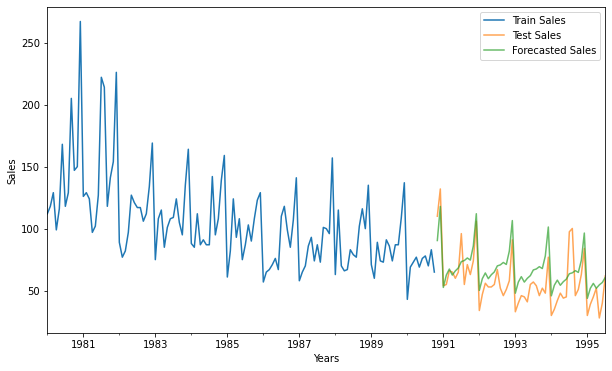

In [359]:
axis = train['Rose'].plot(label='Train Sales', figsize=(10, 6))
testCopy['Rose'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['df_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [360]:
resultsDf_14 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Best SARIMA Model : SARIMAX(1, 0, 1)x(1, 0, 1, 12)'])

resultsDf = pd.concat([resultsDf, resultsDf_14])
resultsDf

,Test RMSE
RegressionOnTime,19.864009
NaiveModel,22.374447
SimpleAverageModel,51.238342
2pointTrailingMovingAverage,12.815041
4pointTrailingMovingAverage,17.184213
6pointTrailingMovingAverage,17.724516
9pointTrailingMovingAverage,18.556574
"Alpha=0.102,SES",29.768405
"Alpha=0.158,Beta=0.106:DES",24.396848
"Alpha=0.088,Beta=9.814,Gamma=9.641:TES",16.074613


In [361]:
#Forecast sales using the best fit SARIMA model as per RMSE 

In [362]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [363]:
n_steps = 36
idx = pd.date_range(start='1995-07-31',end='1998-07-01',freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1995-08-01,90.427383,63.947238,127.872787,63.947238,127.872787
1995-09-01,117.896953,83.218052,167.027359,83.218052,167.027359
1995-10-01,52.621441,37.087318,74.662074,37.087318,74.662074
1995-11-01,62.568451,44.017579,88.937446,44.017579,88.937446
1995-12-01,67.420867,47.345592,96.008376,47.345592,96.008376


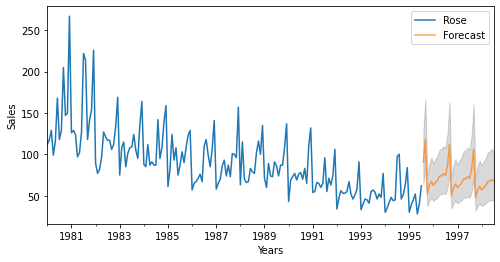

In [364]:
# plot the forecast along with the confidence band

axis = df.plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

In [365]:
# Plot ACF and PACF for residuals of ARIMA model to ensure no more information is left for extraction

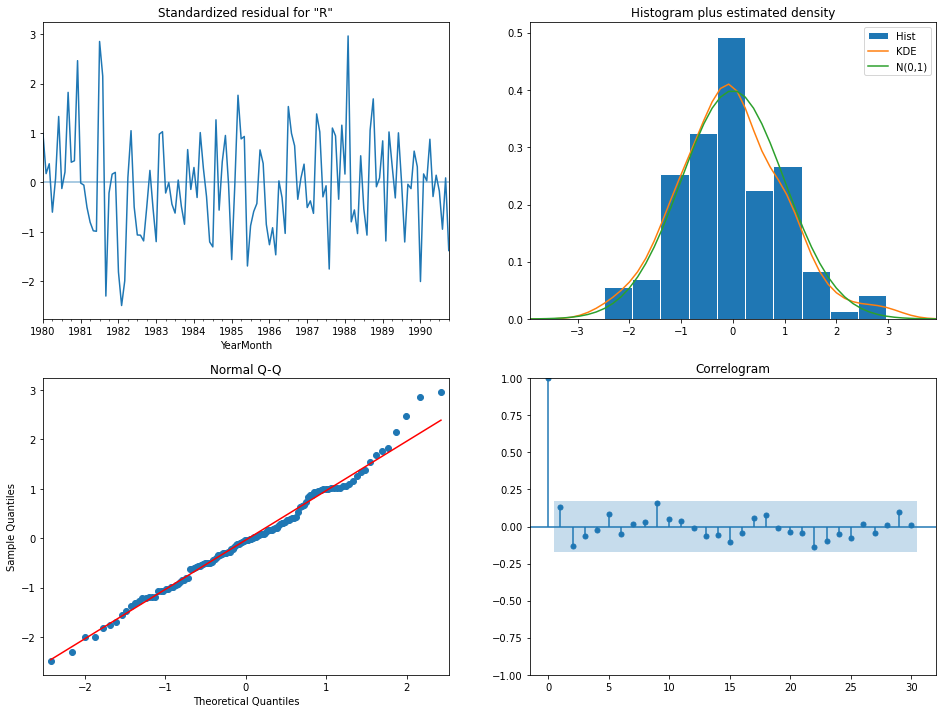

In [366]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

In [367]:
df.tail()

,Rose
YearMonth,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0
